In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("monthly_milk_production.csv", index_col='Date',parse_dates=True)

In [3]:
df.dtypes

Production    int64
dtype: object

In [4]:
df.index.freq='MS'

In [5]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

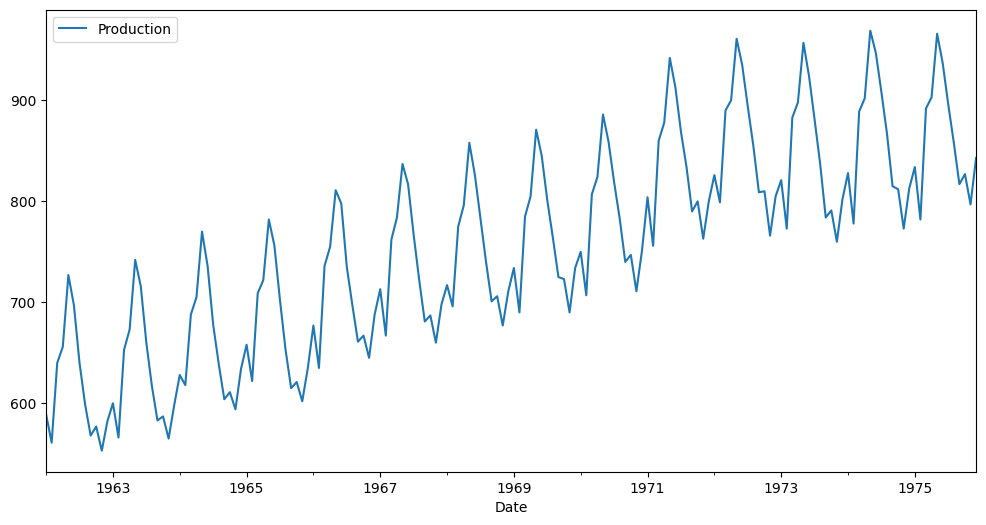

In [6]:
df.plot(figsize=(12,6))

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

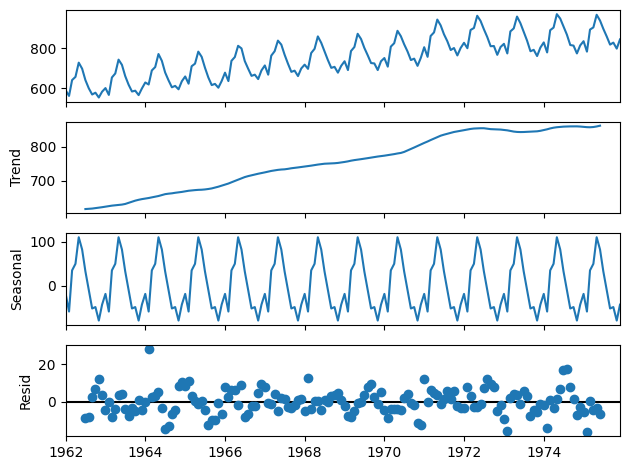

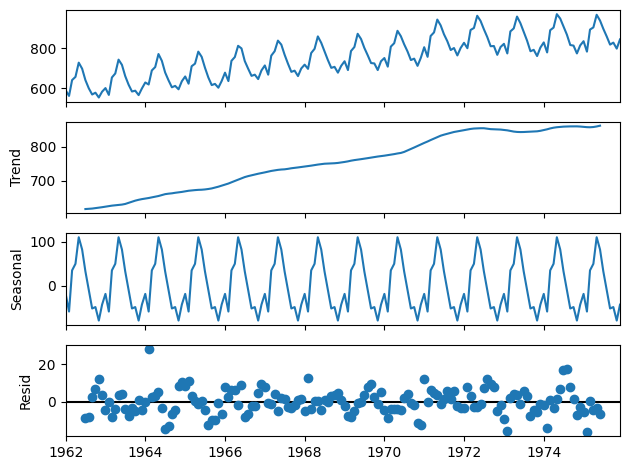

In [8]:
decomposed_data = seasonal_decompose(df)
decomposed_data.plot()

In [9]:
len(df)

168

In [10]:
train_set = df.iloc[:130]
test_set = df.iloc[130:]

In [11]:
train_set.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [15]:
9## Prepare data for 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
scaler.fit(df)
scaled_train = scaler.transform(train_set)
scaled_test = scaler.transform(test_set)

In [20]:
scaled_full_set = np.concatenate((scaled_train, scaled_test))

In [21]:
df['Scaled_Production'] = scaled_full_set

In [22]:
display(df.head())
display(df.tail())

,Production,Scaled_Production
Date,,
1962-01-01,589,0.086538
1962-02-01,561,0.019231
1962-03-01,640,0.209135
1962-04-01,656,0.247596
1962-05-01,727,0.418269


,Production,Scaled_Production
Date,,
1975-08-01,858,0.733173
1975-09-01,817,0.634615
1975-10-01,827,0.658654
1975-11-01,797,0.586538
1975-12-01,843,0.697115


In [37]:

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [39]:
# define generator

n_input = 3
n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [41]:

X.shape

(1, 3, 1)

In [43]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [45]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [47]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\nithi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:

# fit model
model.fit(generator,epochs=50)

Epoch 1/50


C:\Users\nithi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1054
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0223
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0133
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0241
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0167
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0097
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0049
Epoch 13/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036
Epoch 14/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 15/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041


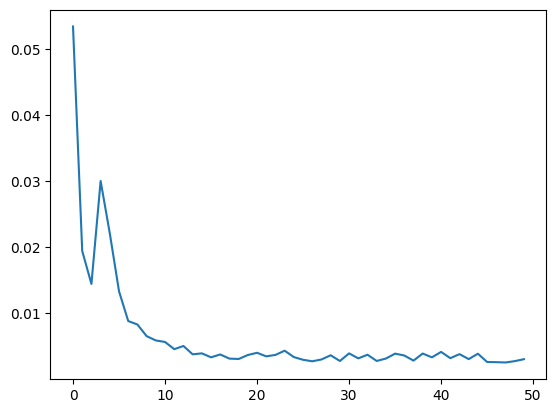

In [53]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [55]:
last_train_batch = scaled_train[-12:]

In [57]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [59]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


array([[0.5704756]], dtype=float32)

In [61]:
scaled_test[0]

array([0.51201923])

In [77]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_set)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [79]:
test_predictions

[array([0.5704756], dtype=float32),
 array([0.5969874], dtype=float32),
 array([0.6244033], dtype=float32),
 array([0.6818981], dtype=float32),
 array([0.79232377], dtype=float32),
 array([0.8657525], dtype=float32),
 array([0.91320777], dtype=float32),
 array([0.9064398], dtype=float32),
 array([0.8494927], dtype=float32),
 array([0.74857], dtype=float32),
 array([0.6670746], dtype=float32),
 array([0.61568415], dtype=float32),
 array([0.5876627], dtype=float32),
 array([0.5960961], dtype=float32),
 array([0.6353684], dtype=float32),
 array([0.7087159], dtype=float32),
 array([0.7927383], dtype=float32),
 array([0.8586928], dtype=float32),
 array([0.89870405], dtype=float32),
 array([0.9063256], dtype=float32),
 array([0.86545026], dtype=float32),
 array([0.7821866], dtype=float32),
 array([0.69630146], dtype=float32),
 array([0.62928176], dtype=float32),
 array([0.5984955], dtype=float32),
 array([0.6063578], dtype=float32),
 array([0.64892894], dtype=float32),
 array([0.71880865], d

In [85]:

true_predictions = scaler.inverse_transform(test_predictions)
     

In [89]:
test_set['Predictions'] = true_predictions

C:\Users\nithi\AppData\Local\Temp\ipykernel_15784\1650265419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = true_predictions


In [93]:
test_set.head()

,Production,Predictions
Date,,
1972-11-01,766,790.317841
1972-12-01,805,801.346769
1973-01-01,821,812.751772
1973-02-01,773,836.669617
1973-03-01,883,882.606688


<Axes: xlabel='Date'>

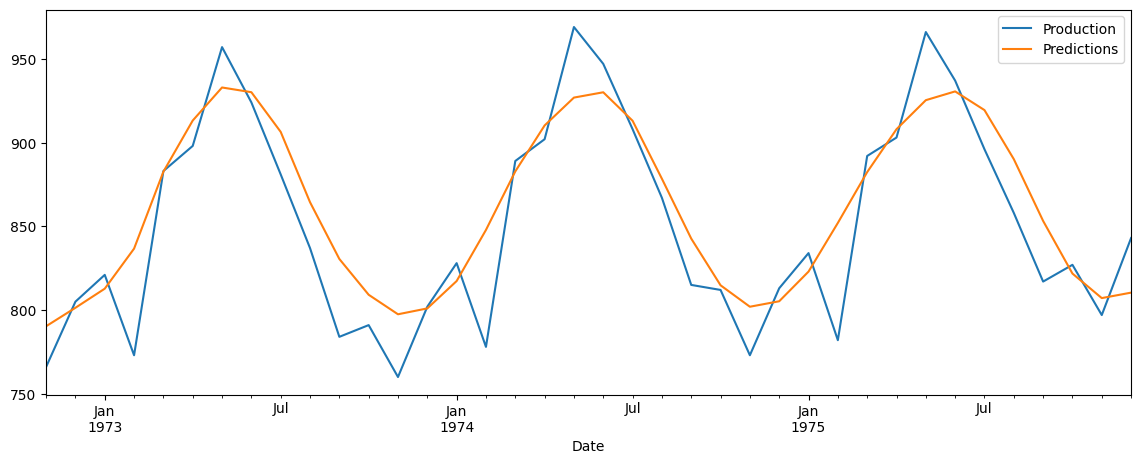

In [91]:
test_set.plot(figsize=(14,5))